In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HDHI Admission data.csv')
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [4]:
len(data.columns)

56

In [5]:
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
    'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 
    'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
    'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 
    'PULMONARY EMBOLISM', 'CHEST INFECTION'
]


In [6]:
disease_values = data[disease_columns]
disease_values

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(data['GENDER'].value_counts())
print(data['RURAL'].value_counts())
print(data['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts())
print(data['OUTCOME'].value_counts())

GENDER
M    9990
F    5767
Name: count, dtype: int64
RURAL
U    12077
R     3680
Name: count, dtype: int64
TYPE OF ADMISSION-EMERGENCY/OPD
E    10924
O     4833
Name: count, dtype: int64
OUTCOME
DISCHARGE    13756
EXPIRY        1105
DAMA           896
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['RURAL'] = le.fit_transform(data['RURAL'])
data['TYPE OF ADMISSION-EMERGENCY/OPD'] = le.fit_transform(data['TYPE OF ADMISSION-EMERGENCY/OPD'])
#data['OUTCOME'] = le.fit_transform(data['OUTCOME'])

In [10]:
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,1,0,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,1,0,0,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,1,1,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,0,1,0,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,0,1,0,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,0,1,1,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,1,0,0,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,1,1,0,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,0,1,1,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  int32 
 6   RURAL                            15757 non-null  int32 
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  int32 
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [12]:
data.isnull().sum()

SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          247


In [13]:
data = data.replace('NILL', np.nan)

In [14]:
'''
plt.figure(figsize = (21, 11))
correlation = data.corr()
sns.heatmap(correlation, annot = True)
'''

'\nplt.figure(figsize = (21, 11))\ncorrelation = data.corr()\nsns.heatmap(correlation, annot = True)\n'

In [15]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print(f"Total number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Total number of duplicate rows: 0
Empty DataFrame
Columns: [SNO, MRD No., D.O.A, D.O.D, AGE, GENDER, RURAL, TYPE OF ADMISSION-EMERGENCY/OPD, month year, DURATION OF STAY, duration of intensive unit stay, OUTCOME, SMOKING , ALCOHOL, DM, HTN, CAD, PRIOR CMP, CKD, HB, TLC, PLATELETS, GLUCOSE, UREA, CREATININE, BNP, RAISED CARDIAC ENZYMES, EF, SEVERE ANAEMIA, ANAEMIA, STABLE ANGINA, ACS, STEMI, ATYPICAL CHEST PAIN, HEART FAILURE, HFREF, HFNEF, VALVULAR, CHB, SSS, AKI, CVA INFRACT, CVA BLEED, AF, VT, PSVT, CONGENITAL, UTI, NEURO CARDIOGENIC SYNCOPE, ORTHOSTATIC, INFECTIVE ENDOCARDITIS, DVT, CARDIOGENIC SHOCK, SHOCK, PULMONARY EMBOLISM, CHEST INFECTION]
Index: []

[0 rows x 56 columns]


In [16]:
import pandas as pd

# Extract the month from 'month year' column and create a new 'month' column
data['month'] = data['month year'].str[:3]  # Extracts the first three letters (e.g., 'Apr', 'May')

# Group by the 'month' and sum each disease count across all years
monthly_aggregated_counts = data.groupby('month')[disease_columns].sum()

# Reorder the months (Optional, for better readability)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_aggregated_counts = monthly_aggregated_counts.reindex(month_order)

# Display the result
print("Total count of each disease for every month (aggregated across all years):")
print(monthly_aggregated_counts)

Total count of each disease for every month (aggregated across all years):
        DM  HTN   CAD  PRIOR CMP  CKD  RAISED CARDIAC ENZYMES  SEVERE ANAEMIA  \
month                                                                           
Jan    539  799  1206        269  198                     354              37   
Feb    374  734  1039        222  157                     250              31   
Mar    362  690   962        207  132                     245              17   
Apr    343  488   639        187   67                     180              12   
May    493  614   809        225  117                     185              12   
Jun    491  616   786        240  111                     214              17   
Jul    404  549   760        183  115                     197              26   
Aug    354  506   733        151  122                     189              23   
Sep    352  578   800        190   97                     228              23   
Oct    340  599   848        175  

In [17]:
data.isnull().sum()

SNO                                   0
MRD No.                               1
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          247


In [18]:
dataframe=data
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,234735,4/1/2017,4/3/2017,81,1,0,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Apr
1,2,234696,4/1/2017,4/5/2017,65,1,0,0,Apr-17,5,...,0,0,0,0,0,0,0,0,0,Apr
2,3,234882,4/1/2017,4/3/2017,53,1,1,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Apr
3,4,234635,4/1/2017,4/8/2017,67,0,1,0,Apr-17,8,...,0,0,0,0,0,0,0,0,0,Apr
4,5,234486,4/1/2017,4/23/2017,60,0,1,0,Apr-17,23,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,0,1,1,Mar-19,5,...,0,0,0,0,0,0,0,0,0,Mar
15753,15754,699500,3/31/2019,4/1/2019,50,1,0,0,Mar-19,2,...,0,0,0,0,0,0,0,0,0,Mar
15754,15755,700415,31/03/2019,09/04/2019,82,1,1,0,Mar-19,10,...,0,0,0,0,0,0,0,0,0,Mar
15755,15756,699524,31/03/2019,03/04/2019,59,0,1,1,Mar-19,4,...,0,0,0,0,0,0,0,0,0,Mar


In [19]:
dataframe['HB']=dataframe['HB'].fillna(dataframe['HB'].mode()[0])

In [20]:
dataframe['TLC']=dataframe['TLC'].fillna(dataframe['TLC'].mode()[0])

In [21]:
dataframe['PLATELETS']=dataframe['PLATELETS'].fillna(dataframe['PLATELETS'].mode()[0])

In [22]:
dataframe['GLUCOSE']=dataframe['GLUCOSE'].fillna(dataframe['GLUCOSE'].mode()[0])

In [23]:
dataframe['UREA']=dataframe['UREA'].fillna(dataframe['UREA'].mode()[0])

In [24]:
dataframe['CREATININE']=dataframe['CREATININE'].fillna(dataframe['CREATININE'].mode()[0])

In [25]:
dataframe['BNP']=dataframe['BNP'].fillna(dataframe['BNP'].mode()[0])

In [26]:
dataframe['EF']=dataframe['EF'].fillna(dataframe['EF'].mode()[0])

In [27]:
dataframe.isnull().sum()

SNO                                0
MRD No.                            1
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [28]:
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,234735,4/1/2017,4/3/2017,81,1,0,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Apr
1,2,234696,4/1/2017,4/5/2017,65,1,0,0,Apr-17,5,...,0,0,0,0,0,0,0,0,0,Apr
2,3,234882,4/1/2017,4/3/2017,53,1,1,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Apr
3,4,234635,4/1/2017,4/8/2017,67,0,1,0,Apr-17,8,...,0,0,0,0,0,0,0,0,0,Apr
4,5,234486,4/1/2017,4/23/2017,60,0,1,0,Apr-17,23,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,0,1,1,Mar-19,5,...,0,0,0,0,0,0,0,0,0,Mar
15753,15754,699500,3/31/2019,4/1/2019,50,1,0,0,Mar-19,2,...,0,0,0,0,0,0,0,0,0,Mar
15754,15755,700415,31/03/2019,09/04/2019,82,1,1,0,Mar-19,10,...,0,0,0,0,0,0,0,0,0,Mar
15755,15756,699524,31/03/2019,03/04/2019,59,0,1,1,Mar-19,4,...,0,0,0,0,0,0,0,0,0,Mar


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15756 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  int32 
 6   RURAL                            15757 non-null  int32 
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  int32 
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [30]:
from scipy.stats import uniform
from sklearn import linear_model
from sklearn.utils import resample
from scipy.stats import loguniform
from sklearn.metrics import f1_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import precision_score
from scipy.stats import median_abs_deviation
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RepeatedStratifiedKFold


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
#use pipeline to scale numeric features and encode categorical features
numeric_features = ['AGE','duration of intensive unit stay','SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 
                    'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
                    'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
                    'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
                    'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
                    'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
                    'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
                    'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM']
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

categorical_features = ['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
                    'OUTCOME', 'CHEST INFECTION','lengthofstay']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
#cat_encoded = categorical_transformer.fit_transform(dataframe[['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD','OUTCOME', 'CHEST INFECTION']])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [33]:
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,234735,4/1/2017,4/3/2017,81,1,0,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Apr
1,2,234696,4/1/2017,4/5/2017,65,1,0,0,Apr-17,5,...,0,0,0,0,0,0,0,0,0,Apr
2,3,234882,4/1/2017,4/3/2017,53,1,1,0,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Apr
3,4,234635,4/1/2017,4/8/2017,67,0,1,0,Apr-17,8,...,0,0,0,0,0,0,0,0,0,Apr
4,5,234486,4/1/2017,4/23/2017,60,0,1,0,Apr-17,23,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,0,1,1,Mar-19,5,...,0,0,0,0,0,0,0,0,0,Mar
15753,15754,699500,3/31/2019,4/1/2019,50,1,0,0,Mar-19,2,...,0,0,0,0,0,0,0,0,0,Mar
15754,15755,700415,31/03/2019,09/04/2019,82,1,1,0,Mar-19,10,...,0,0,0,0,0,0,0,0,0,Mar
15755,15756,699524,31/03/2019,03/04/2019,59,0,1,1,Mar-19,4,...,0,0,0,0,0,0,0,0,0,Mar


In [34]:
dataframe.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'month'],
      dtype='object')

In [35]:
disease_columns

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [36]:
selected_features=[]
selected_features=disease_columns



In [37]:
selected_features

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [38]:
selected_features.append('month')

In [39]:
selected_features

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION',
 'month']

In [40]:
dataframe1=dataframe[selected_features]

In [41]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Apr
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Mar
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DM                         15757 non-null  int64 
 1   HTN                        15757 non-null  int64 
 2   CAD                        15757 non-null  int64 
 3   PRIOR CMP                  15757 non-null  int64 
 4   CKD                        15757 non-null  int64 
 5   RAISED CARDIAC ENZYMES     15757 non-null  int64 
 6   SEVERE ANAEMIA             15757 non-null  int64 
 7   ANAEMIA                    15757 non-null  int64 
 8   STABLE ANGINA              15757 non-null  int64 
 9   ACS                        15757 non-null  int64 
 10  STEMI                      15757 non-null  int64 
 11  ATYPICAL CHEST PAIN        15757 non-null  int64 
 12  HEART FAILURE              15757 non-null  int64 
 13  HFREF                      15757 non-null  int6

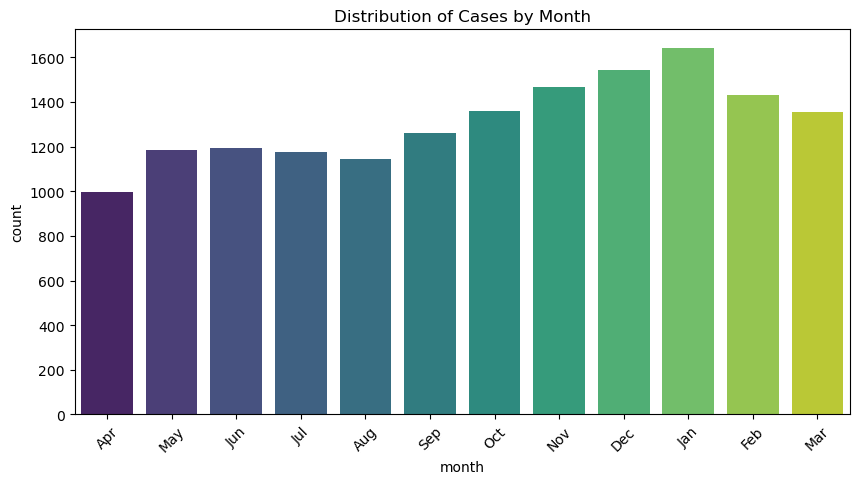

ValueError: could not convert string to float: '\\'

<Figure size 1500x1000 with 0 Axes>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = dataframe1

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Display the first few rows of the dataset
print("\nSample Data:")
print(df.head())

# 1. Summary statistics
print("\nStatistical Summary:")
print(df.describe())

# 2. Checking the distribution of the target column 'month'
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df, palette='viridis')
plt.title("Distribution of Cases by Month")
plt.xticks(rotation=45)
plt.show()

# 3. Correlation heatmap for numerical columns
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 4. Distribution of medical conditions
condition_cols = df.columns[:-1]  # Exclude the 'month' column
condition_counts = df[condition_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=condition_counts.values, y=condition_counts.index, palette='plasma')
plt.title("Frequency of Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()

# 5. Analyze how medical conditions vary by month
monthly_conditions = df.groupby('month').sum().T

plt.figure(figsize=(15, 10))
sns.heatmap(monthly_conditions, cmap='YlGnBu')
plt.title("Heatmap of Conditions by Month")
plt.xlabel("Month")
plt.ylabel("Condition")
plt.show()

# 6. Pairplot to check relationships (optional if dataset size is manageable)
sns.pairplot(df.sample(1000), hue='month', palette='Set2')  # Random sample of 1000 rows for better performance
plt.show()

# 7. Checking for any potential outliers using box plots
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Boxplot of All Features")
plt.show()

# 8. Analysis of comorbidities (co-occurrence of conditions)
comorbidities = (df[condition_cols].sum(axis=1) > 1).sum()
print(f"\nNumber of patients with multiple conditions: {comorbidities}/{len(df)}")

# 9. Pivot table to show condition prevalence per month
pivot_table = pd.pivot_table(df, index='month', values=condition_cols, aggfunc='sum')
print("\nCondition prevalence per month:")
print(pivot_table)

# 10. Saving the EDA results to CSV (optional)
pivot_table.to_csv("monthly_condition_analysis.csv")
